In [5]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the Data

df = pd.read_csv(r'C:\Users\usuario\Desktop\Google Cours\Portfolio\movies.csv')

In [7]:
# Check the Data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [28]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(col, pct_missing)
    
df['budget'] = df['budget'].fillna(0)

df['gross'] = df['gross'].fillna(0)

name 0.0
rating 0.010041731872717789
genre 0.0
year 0.0
released 0.0002608242044861763
score 0.0003912363067292645
votes 0.0003912363067292645
director 0.0
writer 0.0003912363067292645
star 0.00013041210224308815
country 0.0003912363067292645
budget 0.0
gross 0.0
company 0.002217005738132499
runtime 0.0005216484089723526


In [30]:
# Data type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [29]:
# Change the data type of some columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [56]:
# Creat correct year column

df[['date_correct','year_correct']] = df['released'].astype(str).str.split(",",expand=True)

df[['year_correct', 'Country_realesed']] = df['year_correct'].str.split("(",expand=True)

df['Country_realesed'] = df ['Country_realesed'].str.replace(')','')

df.head()

C:\Users\usuario\AppData\Local\Temp\ipykernel_3452\899088294.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Country_realesed'] = df ['Country_realesed'].str.replace(')','')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,date_correct,Country_realesed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June 13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July 2,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June 20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July 2,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July 25,United States


In [90]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,date_correct,Country_realesed
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29,86,56
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39,31,56
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17,87,56
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35,86,56
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38,32,56


In [59]:
pd.set_option('display.max_rows', None)

In [91]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

df.drop_duplicates().head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,date_correct,Country_realesed
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0,212,56
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0,188,56
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0,223,56
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0,188,56
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0,194,56


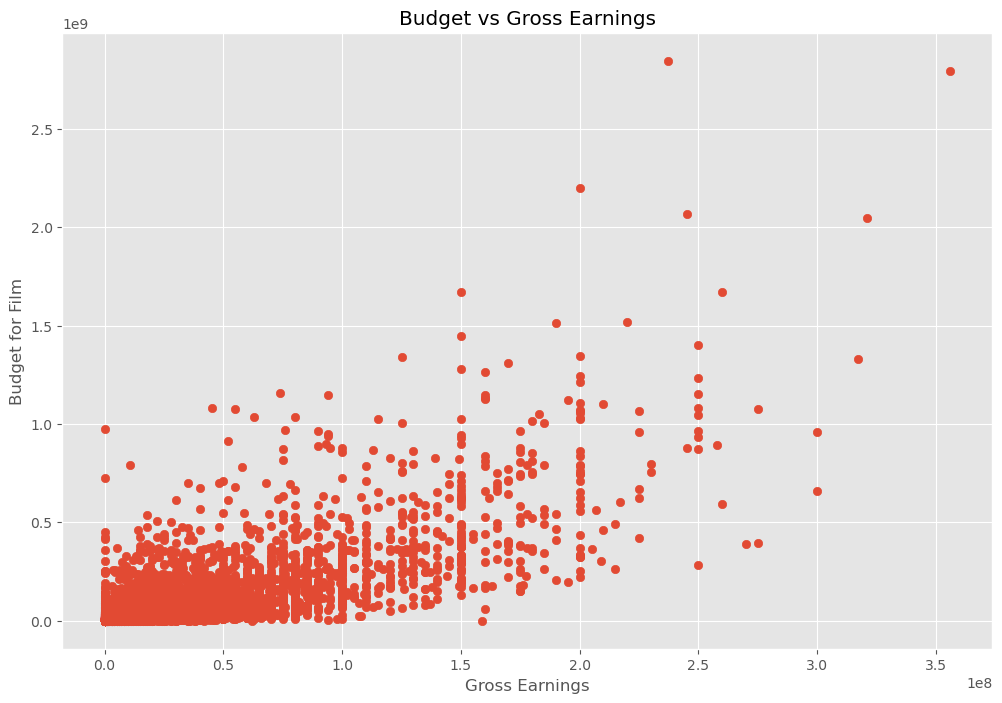

In [85]:
# Sactter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

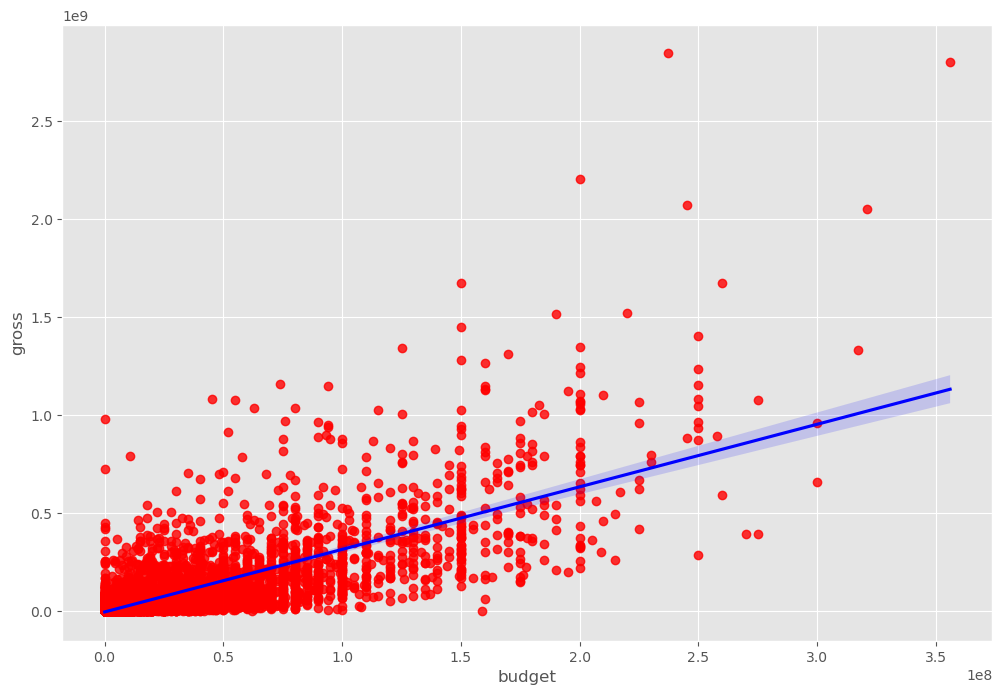

In [69]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

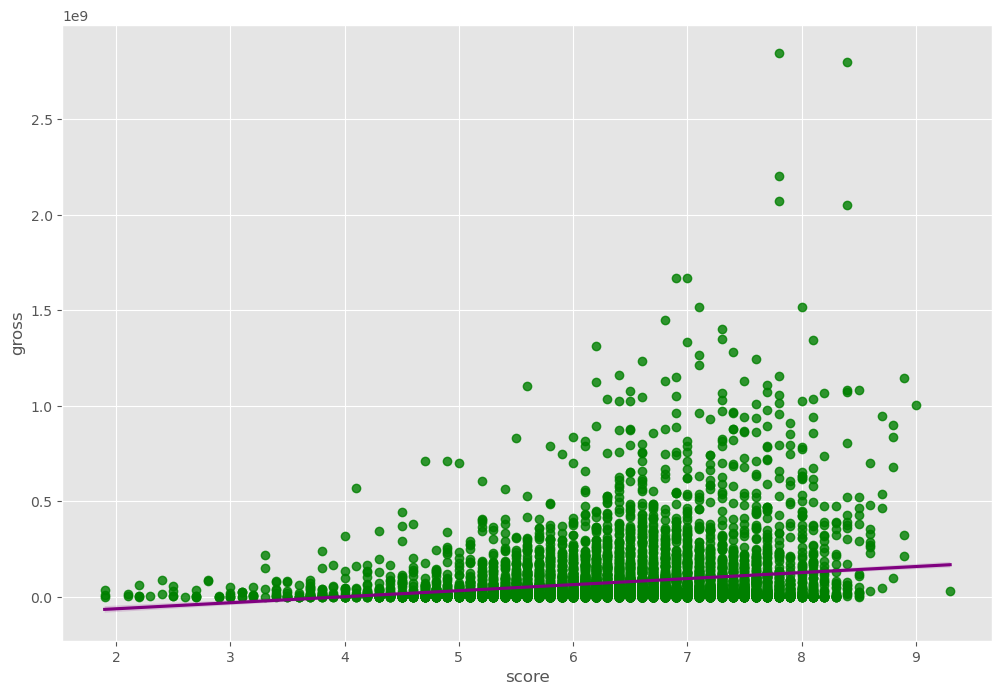

In [89]:
# Plot score vs gross using seaborn

sns.regplot(x="score", y="gross", data=df, scatter_kws={"color":"green"}, line_kws={"color":"purple"})

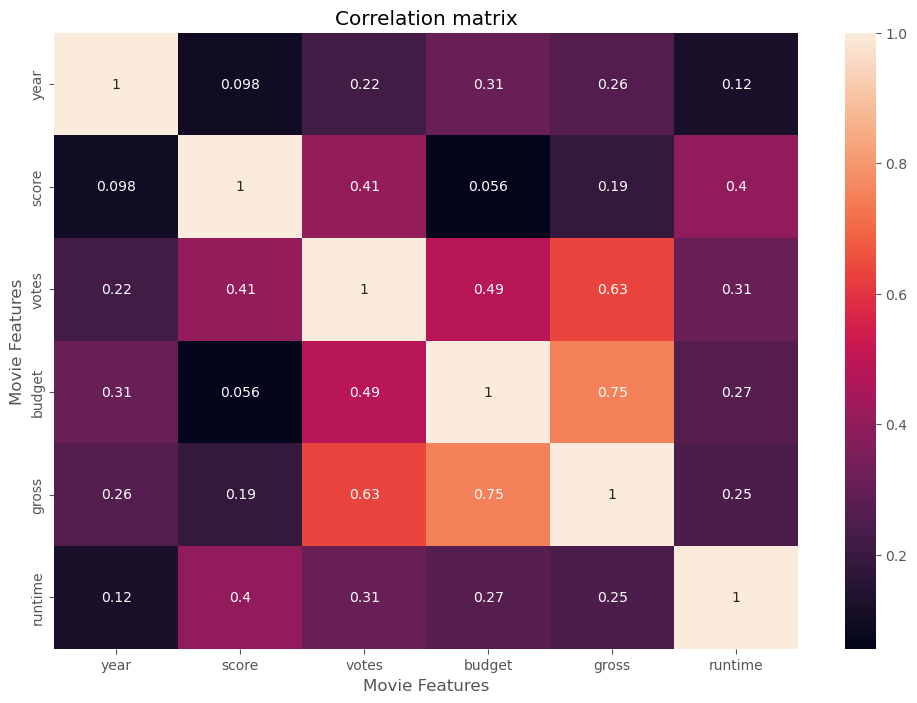

In [72]:
# Correlation matrix visualization

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [83]:
# Assigns a random numeric value for each unique categorical value

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,date_correct,Country_realesed
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0,212,56
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0,188,56
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0,223,56
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0,188,56
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0,194,56


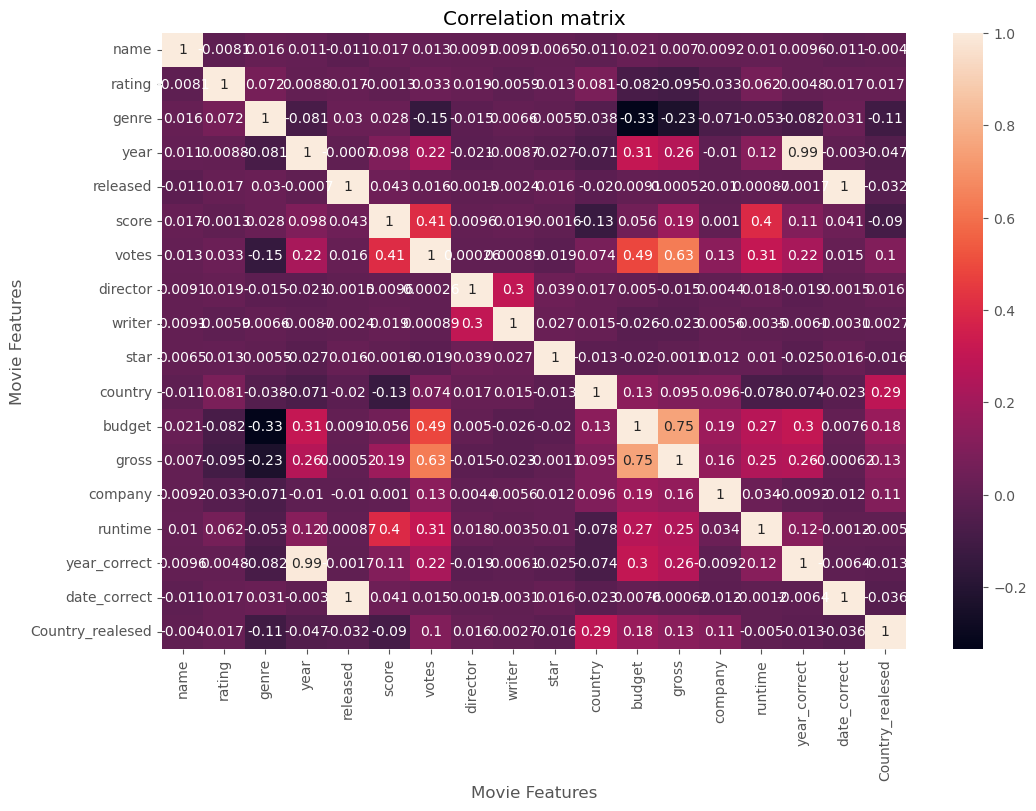

In [75]:
# Correlation matrix visualization

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [92]:
# Correlation pairs

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head(10)

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [94]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(10)

genre             budget             -0.334021
budget            genre              -0.334021
gross             genre              -0.234297
genre             gross              -0.234297
                  votes              -0.145307
votes             genre              -0.145307
score             country            -0.133348
country           score              -0.133348
genre             Country_realesed   -0.106374
Country_realesed  genre              -0.106374
dtype: float64

In [82]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross             votes               0.632834
votes             gross               0.632834
budget            gross               0.750157
gross             budget              0.750157
year_correct      year                0.992136
year              year_correct        0.992136
date_correct      released            0.998257
released          date_correct        0.998257
name              name                1.000000
year_correct      year_correct        1.000000
rating            rating              1.000000
genre             genre               1.000000
year              year                1.000000
released          released            1.000000
score             score               1.000000
votes             votes               1.000000
date_correct      date_correct        1.000000
director          director            1.000000
star              star                1.000000
country           country             1.000000
budget            budget              1.000000
gross        

In [ ]:
# Votes and budgets have the highest correlation to gross earnings

# Company has low correlation
